<div style="border: 6px solid #18453B; padding: 10px; border-radius: 5px; text-align: center;">
   <img src="https://miro.medium.com/v2/resize:fit:2000/1*N1-K-A43_98pYZ27fnupDA.jpeg" alt="Placeholder image" width=900>
    <h1 style="color: #4CAF50;">Homework 06:<br>Linear Regression & Projects</h1>
    <p>Let's learn a bit more about linear regression!</p>
 
</div>


### Instructions for Submitting Names in Notebooks

Please follow the format below when typing your names in the notebook. 

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**

#### Example:
    Poe, Edgar Allan

> ⚠️ **Failure to follow this format will result in a reduction of your grade.**

Belieu, Joshua Alan

## <font color=#33AA44>Problem #1 (10pts)</font>

![loss](https://miro.medium.com/max/574/1*mOjTP97xJacJLEAQx_L9eA.png)


Derive the basic equations given in class for linear regression (LR) in 1D. Show all of your work. In the next markdown cell and use [$\LaTeX$](https://ashki23.github.io/markdown-latex.html) for the equations.

That is, use the MSE loss function:
$${\cal L}(m,b) = \frac{1}{2}\sum_d \left(y_d - mx_d - b \right)^2,$$
and the minimization condition
$$\frac{\partial {\cal L}}{\partial m} = 0,$$
$$\frac{\partial {\cal L}}{\partial b} = 0.$$
Hopefully you remember how to do partial derivatives! If not, contact us right away! These mathematical steps minimize the loss function and are the statement of _optimization_: see the picture above.

When you do this you should end up with two algebraic equations that involve sums over the data. It might look "messy" - no problem. Show all of your work. What you want to do is solve for $m$ and $b$ (I am using the slope and intercept notation in this problem): if we can write all of the sums in terms of $m$ and $b$, then we have solved the linear regression problem once and for all! We simply plug the data into the sums and out pops the "slope" and "intercept"! 

[Ok, what you are doing here is impressive, but there are some caveats to the "once and for all" statement. We can modify the loss function in many ways and we would need to redo this optimization problem again for each choice.]

Next, once you have solved for $m$ and $b$, write your answer in terms of **statistical quantities** such as the variances, covariances and/or means. Note that you have two equations in two unknowns; you will have to solve those simultaneous equations to get the expressions for $m$ and $b$. 

There are many different notations used for these types of problems. I suggest you establish a convention you like to use and stick with it. Here is what I propose we use for now:

* expectation value (mean)
$$\mathrm{E}[X] \equiv \langle X\rangle \equiv \mu,$$
$$    = \frac{1}{N}\sum_{d=1}^N x_d,$$
where the $d$ sum is over the $N$ data points.

* variance
$$\mathrm{Var}[X] = \mathrm{E}[(X - \mathrm{E}[X])^2],$$
$$    = \mathrm{E}[X^2] - \mathrm{E}[X]^2,$$
$$    = \langle X^2\rangle - \mu^2,$$
$$    = \mathrm{Cov}[X,X].$$

* covariance
$$\mathrm{Cov}[X,Y] = \mathrm{E}[(X - \mathrm{E}[X])(Y - \mathrm{E}[Y])],$$
$$    = \mathrm{E}[XY] - \mathrm{E}[X]\mathrm{E}[Y].$$

I tried to follow definitions used in Wikipedia so that we can all use the same conventions. Note that I have indicated some options for the mean so that you get used to seeing different forms.

I wanted to comment on these conventions. There are two choices here that are not universal: the factor of $\frac{1}{2}$ in ${\cal L}$ and the factor of $\frac{1}{N}$ in the statistical quantities. Neither of these choices really matters as long as you:
* are consistent everywhere in your math,
* use other people's libraries correctly (e.g., `statsmodels`),
* communicate to others what you did.

These choices are commonly made because they make the math cleaner, as you might have noticed already.

Organize your equations so that you completely understand them. You will code them in the next problem. Now that you have these equations you can do linear regression trivially on any dataset - congrats!

Here is what you should get from this problem:
* we start with ${\cal L}$, which in machine learning is referred to as a loss function; there are many, many types of loss functions,
* in each case, by writing the problem in terms of a loss function, we have converted our goal directly into the mathematical problem of optimization,
* in this problem, you go the next step to rewrite the equations you derive in terms of statistical quantities: this shows how linear regression is connected to statistics,
* you should clearly see that we can find patterns in data using the fields of optimization and statistics; next week we will super-power this with linear algebra.

✏️ **Answer** Put your answer in this cell. $\LaTeX$ 

$$
\frac{\partial\mathcal{L}}{\partial m}=\frac{\partial}{\partial m}\left[\frac{1}{2}\sum_d(y_d-mx_d-b)^2\right]=\frac{2}{2}\sum_d(y_d-mx_d-b)\frac{\partial}{\partial m}\bigg[y_d-mx_d-b\bigg]=\sum_d(y_d-mx_d-b)(-x_d)=\sum_d y_dx_d-mx_d^2-bx_d
$$

$$
=N\langle XY\rangle-mN\langle X^2\rangle-bN\langle X\rangle=0\Rightarrow \langle XY\rangle-m\langle X^2\rangle-b\langle X\rangle = 0 \quad (1)
$$

$$
\frac{\partial\mathcal{L}}{\partial b}=\frac{\partial}{\partial b}\left[\frac{1}{2}\sum_d(y_d-mx_d-b)^2\right]=\frac{2}{2}\sum_d(y_d-mx_d-b)\frac{\partial}{\partial b}\bigg[y_d-mx_d-b\bigg]=\sum_d(y_d-mx_d-b)(-1)=-N(\langle Y\rangle-m\langle X\rangle-b)=0
$$

$$
\Rightarrow \langle Y\rangle-m\langle X\rangle-b=0 \quad (2)
$$

Equations 1 and 2 specify a system of equations,

$$
A\bar{x}=\bar{b} \doteq \begin{bmatrix} \langle X^2\rangle & \langle X\rangle \\ \langle X\rangle & 1 \end{bmatrix}\begin{bmatrix} m \\ b\end{bmatrix} = \begin{bmatrix} \langle XY\rangle \\ \langle Y\rangle\end{bmatrix}
$$

I will use sympy to solve this system:

In [4]:
import sympy as sp

x2,x,xy,y = sp.symbols ( 'x2 x xy y' )
A = sp.Matrix ( [[x2 , x],[x , 1]] )
b = sp.Matrix ( [ xy , y ] )
sol = A.solve(b)
print ( f'm={sol[0]},b={sol[1]}' )

m=(x*y - xy)/(x**2 - x2),b=(x*xy - x2*y)/(x**2 - x2)


And so,

$$
m=\frac{\langle X\rangle\langle Y\rangle-\langle XY\rangle}{\langle X\rangle^2-\langle X^2\rangle}=\frac{-\langle X\rangle\langle Y\rangle+\langle XY\rangle}{\text{Cov}[X,X]}=\frac{\text{Cov}[X,Y]}{\text{Cov}[X,X]}
$$

$$
b=\frac{\langle X\rangle\langle XY\rangle-\langle X^2\rangle\langle Y\rangle}{\langle X\rangle^2-\langle X^2\rangle}=\frac{-\langle X\rangle\langle XY\rangle+\langle X^2\rangle\langle Y\rangle}{\text{Cov}[X,X]}=\frac{-\langle X\rangle\langle XY\rangle+\langle X^2\rangle\langle Y\rangle}{\text{Cov}[X,X]}=\frac{-\langle X\rangle\langle XY\rangle\pm \langle X\rangle^2\langle Y\rangle+\langle X^2\rangle\langle Y\rangle}{\text{Cov}[X,X]}
$$
$$
=\frac{(-\langle X\rangle^2+\langle X^2\rangle)\langle Y\rangle}{\text{Cov}[X,X]}+\frac{-\langle X\rangle\langle XY\rangle+\langle X\rangle^2\langle Y\rangle}{\text{Cov}[X,X]}=\frac{\text{Cov}[X,X]\langle Y\rangle}{\text{Cov}[X,X]}+\frac{\langle X\rangle(-\langle XY\rangle+\langle X\rangle\langle Y\rangle)}{\text{Cov}[X,X]}=\langle Y\rangle-\frac{\text{Cov}[X,Y]}{\text{Cov}[X,X]}\langle X\rangle=\langle Y\rangle-m\langle X\rangle
$$

Where this last result is what we expect!

## <font color=#33AA44>Problem #2 (5pts)</font>

![reg](https://miro.medium.com/v2/resize:fit:1400/1*Ug7uflGlIAjFe6lFMACnfA.png)

Create a dataset that is a noisy line; that is, you have $y= mx+b$ and you want to add a controllable amount of noise to that using `randn` in Numpy. From the equations you derived in the first problem, use that data to compute the slope $m'$ and intercept $b'$, where the prime indicates a value inferred from the data. Also, code the equation for $R^2$. 

Confirm with a plot that you are getting a good fit to your data. Vary the noise, make more plots and comment on how well you are able to predict the actual values of $m$ and $b$. I recommend putting the $m$, estimated $m'$, $b$, estimated $b'$ and $R^2$ in the title of the plot with a scatterplot of the data and a solid line with your linear regression prediction. 

Finally, in a markdown cell, discuss how you could use the code you just wrote to handle missing values. Are there other steps you would want to add? For example, if you need to do stochastic regression, could you use the results of this homework? 


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
cov = lambda x,y : np.mean ( x * y ) - np.mean ( x ) * np.mean ( y )
m_pred = lambda x,y : cov ( x,y ) / cov ( x,x )
b_pred = lambda x,y : np.mean ( y ) - m_pred(x,y) * np.mean ( x )

sse = lambda data,cand_func : np.sum ( (data - cand_func) ** 2 )
ssr = lambda data,cand_func : np.sum ( ( cand_func - np.mean(data) ) ** 2 )
sst = lambda data,cand_func : sse ( data , cand_func ) + ssr ( data , cand_func )
r2 = lambda data,cand_func : ssr ( data , cand_func ) / sst ( data , cand_func )

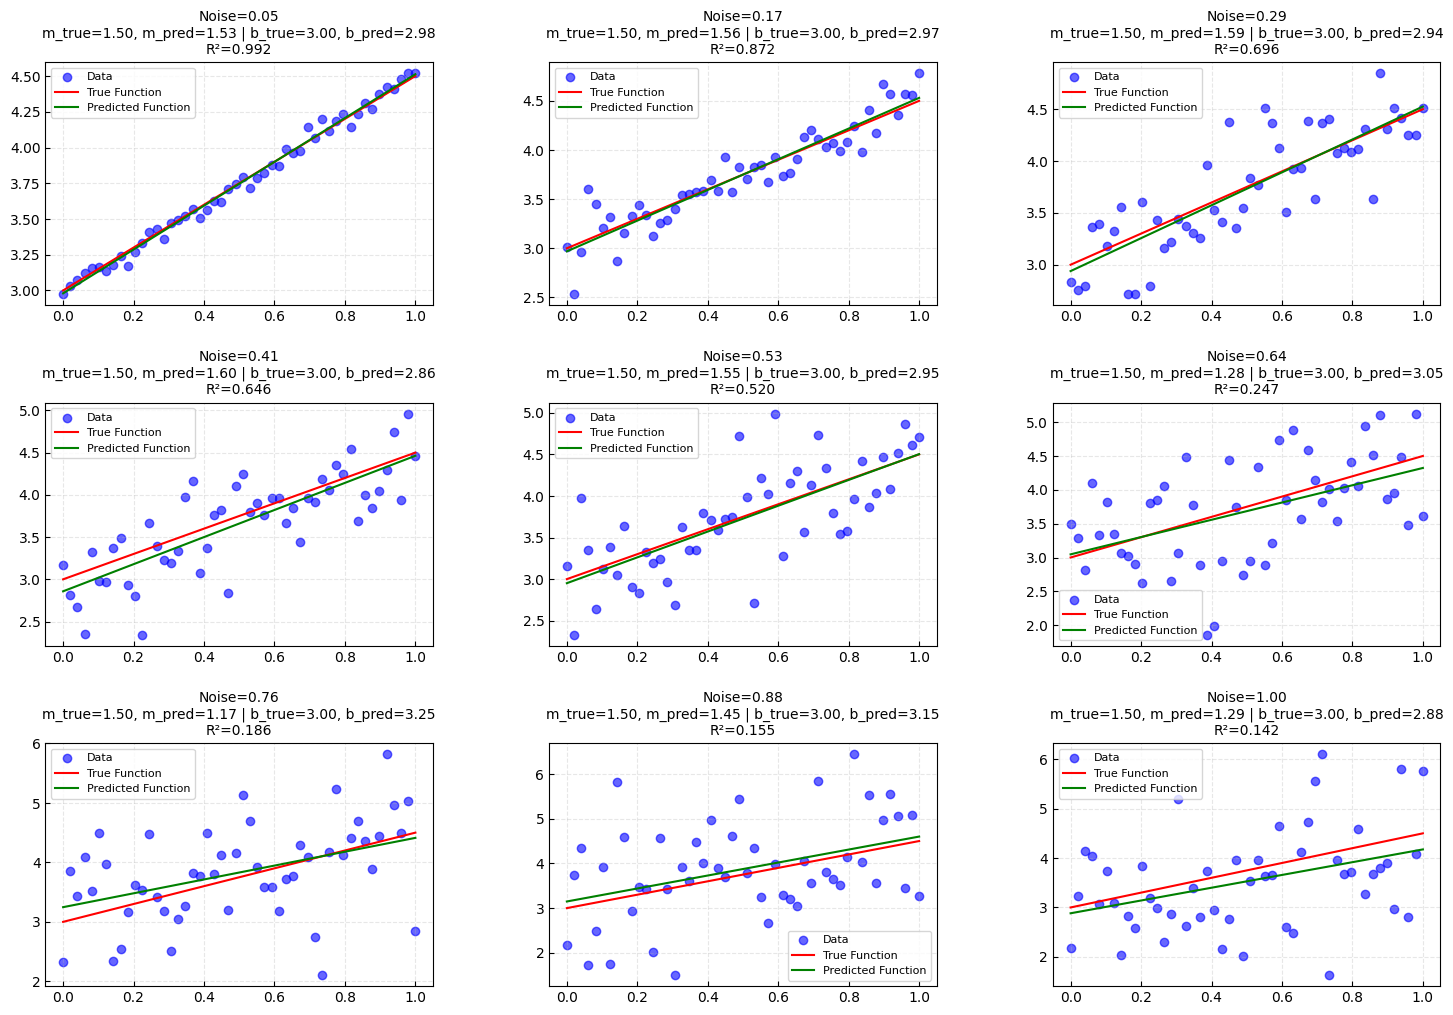

In [104]:
### ANSWER
x_low = 0.
x_high = 1.
n = int ( 5e1 )

m_true = 1.5
b_true = 3.
x = np.linspace ( x_low , x_high , n )
num_plots = 9
noise_variance_arr = np.linspace(0.05, 1.0, num_plots)

'''
below here I wrote a script which performs the same plotting function but I knew
 ChatGPT 5.0 (10.10.2025) could do it better so I dropped my script in and asked
"can this be done better or more succenctly?" This is what resulted.
'''

# Create 3x3 subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Flatten axes array for easier indexing
axs = axs.ravel()

for i, noise_variance in enumerate(noise_variance_arr):

    noise = noise_variance * np.random.randn(n)
    y_true = m_true * x + b_true
    y_noise = y_true + noise

    m_p = m_pred(x, y_noise)
    b_p = b_pred(x, y_noise)
    y_pred = m_p * x + b_p
    r2_val = r2(y_noise, y_pred)

    ax = axs[i]
    ax.scatter(x, y_noise, label='Data', color='blue', alpha=0.6)
    ax.plot(x, y_true, label='True Function', color='red')
    ax.plot(x, y_pred, label='Predicted Function', color='green')
    ax.tick_params(direction='in')
    ax.grid(ls='--', alpha=0.3)
    ax.set_title(
        f"Noise={noise_variance:.2f}\n"
        f"m_true={m_true:.2f}, m_pred={m_p:.2f} | "
        f"b_true={b_true:.2f}, b_pred={b_p:.2f}\n"
        f"R²={r2_val:.3f}",
        fontsize=10
    )
    ax.legend(fontsize=8)
plt.show()

✏️ **Answer** Put your reflections and questions in this cell

I think this could be used in some context because even though as the noise of the data increases it does not appear like we deviated greatly in our prediction to the true function. However, I think it would be another good exercise to employ this scheme again but innstead of adding noise I impute some data and see how the behaviour of the fit changes.

---
## <font color=#33AA44>Problem #3 (5pts)</font>
![smooth](https://miro.medium.com/v2/resize:fit:1400/1*MU-few2K_ZY2gXQdSsFxaw.png)

Explain the differences among regression, smoothing and finding trends, using a markdown cell. 

Connect these three ideas to your project. How will you use, or not use, these three ideas for your project? In general, how do these three approaches fit with our general goal of good storytelling? Can you think of a way to use all three in your project to make the message clearer? 

✏️ **Answer** Put your reflections and questions in this cell

Differences :

Regression - This method employs taking or finding a model for the data and tuning it to reliably fit the data.

Smoothing - This method attempts to peel back the layers of noise that lie on top of a distribution of data in order to expose the underlying dictating expression.

Finding trends - This emthod aims at identifying trends with the data. That is, if the data is periodic, monotonic, cyclic, etc..

Connection to prject :

Regression - This is well suited to my project as I can employ different kinds of regression to extract models which dictate the physics of nuclear systems or produce a reliable method to predict the values of as of yet recorded nuclear properties.

Smoothing - My intuition is not giving me any applications of this method to my project. While it may be useful to reduce noise in the measurments I would be concerned about how much loss of natural information I would lose in employing the method.

Finding trends - This can be incredibly powerful especially if paired with regression analysis and would be useful in this circumstance I think. The only problem I fear would be that the methods to finding trends is expensive and requite implementation outside of my regular allotment for this class.

Story Telling :

Regession - Probably the most direct method to storytelling. It gives a natural path from "how do the things we know have happened happen" to "how will things we haven't seen happen?" if succesfully applied.

Smoothing - This is also great in storytelling because if you can strip noise fron your dataset and extract  the shape of a function you have a route forward to make predictions within a local frame.

Finding trends - Also great for storytelling. This method gives us info about the trend of the system which can inform further predictive analysis.

---

## <font color=#33AA44>Problem #4: Project (20pts)</font>

![project](https://i.ytimg.com/vi/pWxDxhWXJos/maxresdefault.jpg)

In this problem you will work on your project.

Keep in mind that for the midterm, you do not need a complete project. You will need that by the end of the semester. The goals for the midterm project are:

* you have a dataset chosen
* you have done IDA and EDA
* you have a good sense that this dataset will do what you want
* you have a Github repo set up where all of your project work lives
* you are becoming an expert on Streamlist and building apps
* you have completed all of the data science tasks we have covered to date on this dataset (if they apply)
    - this could include:
        - encoding
        - scaling
        - imputation
        - transforming
        - and so on.....review the topics from each week of the course to get a list of everything we have covered so far
* importantly, you can communicate:
    - effective visualization, including interactive visualizations
    - storytelling: you know your audience and you know your user (recall the ICA on knowing who you are presenting your data to)

Also, recall that you can change your project after the midterm. I don't recommend this! It will be much more rewarding if you take your current work to a very complete deliverable by working on it for the entire semester. But, there are cases where this just doesn't work out (and it is totally ok!):
* the data didn't do what you hoped it would: it is very common for us to be overly ambitious with our goals relative to what is in datasets we didn't make ourselves 
* you realize that your original idea is not that interesting after all
* you want to stretch yourself and do a "second" project on something completely different: you might fall in love with _spatiotemporal_ data or _textual_ data in the next few weeks!

So, what should you do for this HW problem? Here is what we will do the week before Fall Break (next week!). We will have two ICAs: no lecture. On Tuesday, you will present your project informally to your group. You will have a set of questions to ask each other and you will turn that in as your ICA. You will also teach each other "tricks": 
* how does each person plan to tell their story (this might not be complete until the end of the semester)
* what visualization ideas did you learn from your group that you want to incorporate into your project?
* what Streamlit tricks did your group share? 

You get the idea: that's Tuesday's ICA. Thursday, you will formally present where you are with your project to a different, random group. More instructions will be given next week, but the basic idea is that you use the wall monitors to present to your group while they ask you questions and you have a discussion. 


**Deployment:** Follow this [link](https://docs.streamlit.io/deploy) to learn how to deploy your web app. Remember we (TA and I) will need the link to view your web app.

✏️ **Answer**

1] Who your audience is

My planned audience is non-physicists. My datasets involve measurements of physical properties of nuclei. This means that in addition to doing the analysis of the project I expect to do a brief intro into the field with specific insights on what is found in the data sets.

2] What story you want to tell with your data

I would like to use the EDA to encourage investigation into features that show nice correlations and how we might improve upon them. I would also love to eventually perform some kind of PCA to see if other foundational notions of nuclear physics become clear. Additionally, I would also like to showcase the power of symbolic regression analysis and apply it to these datasets.

3] What kinds of visualizations and interactivity you’re planning

I plan on visualizing the missing-ness in the datasets, the mono-variate and bi-variate correlations of the datasets, and the correlation of the charge radius with the mass number of nuclei. These plots will contain interactions with the user that will include, applying scalers, imputing data, selecting which dataset to view, and in the case of the last plot - exploring what manipulation of the features results in the best fit and what that fit implies about nuclei, in general.

---
## <font color=#33AA44>Problem #5 (10pts)</font>
![overfit](https://allmodelsarewrong.github.io/allmodelsarewrong_files/figure-html/plotoverfit6-1.png)

In this problem you are going to explore fitting to different models. In doing so, you will learn about feature engineering, using the `PolynomialFeatures` library I mentioned in the lecture. You will also explore the bias-variance tradeoff. 

That's a lot! 

To simply do this, I'll give you the base code. First, run, understand and _heavily_ comment this code. This will teach you how all of these ideas come together. Then, write in a new markdown cell a detailed summary of what the code does and what trends you saw. Vary the parameters that can be and comment on what is in the plots. Add new plots or print out quantities yourself if that helps. 

For example, a very important take-away is this: the error in the training loss monotonically decreases as the order of the polynomial increases. Why is that? But, the test error has a much more complicated dependence. Why is that? What do both of these tell you about the importance of the idea of breaking the data into two pieces: training and testing? 

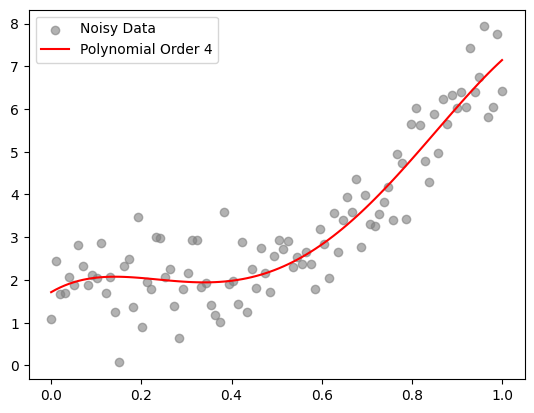

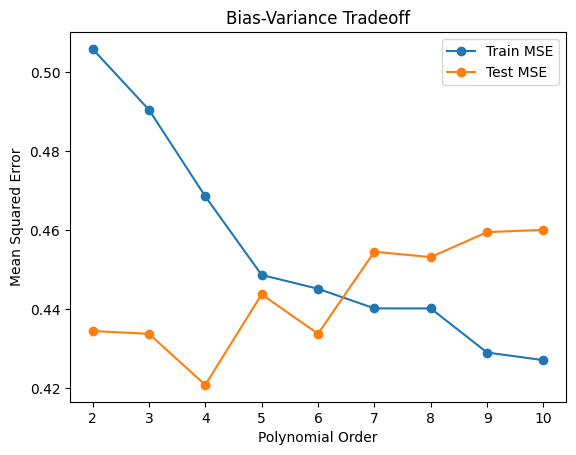

In [ ]:
'imported libraries'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Create a polynomial of a given order
def create_polynomial_data(order, n_samples=100):
    '''
    order : int. order of polynomial.
    n_smaples : int. number of samples, domain resolution.
    '''
    np.random.seed(0) # set seed for reproducibility
    X = np.linspace(0, 1, n_samples) # system domain on [0,1]
    '''
    take the domain and raise it to some integer power. scale this distribution
    of numbers by a random number from a Gaussian and sum the points. then, move
    to next order.
    '''
    y_true = sum([np.random.randn() * (X ** i) for i in range(order + 1)])
    return X, y_true

# Step 2: Add noise to the polynomial
def add_noise(y_true, noise_level=0.1):
    '''
    y_true : array-like. the true distribution.
    noise_level : float. the std of the Gaussian. Default value : 0.1. 
    '''

    '''
    Draw from a Gaussian the number of points in y_true with mean 0 and std equal
    to noise_level.
    '''
    noise = np.random.normal(0, noise_level, size=len(y_true))
    return y_true + noise # add noise to y_true.

# Step 3: Fit polynomial and plot
def fit_and_plot(X, y, order):
    '''
    X : array-like. system domain
    y : array-like. target distribution
    order : int. order of polynomial
    '''

    'prepare an instance of the polynomial transformer with given order.'
    poly = PolynomialFeatures(degree=order)
    'change X into a column vector and fit a polynomial to it of given order.'
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    'Establish an instance of a linear regressor'
    model = LinearRegression()
    'use the polynomial feature data to fit y'
    model.fit(X_poly, y)
    'get a prediction for y off of the polynomial version of X'
    y_pred = model.predict(X_poly)
    
    # Plot original noisy data and fitted polynomial, Plot!
    plt.scatter(X, y, label='Noisy Data', color='gray', alpha=0.6)
    plt.plot(X, y_pred, label=f'Polynomial Order {order}', color='red')
    plt.legend()
    plt.show()
    return model, poly

# Step 4: Fit on training set and calculate MSE on test set
def train_test_evaluate(X, y, order, test_size=0.5):
    '''
    X : array-like. system domain
    y : array-like. system range
    order : int. desired order of polynomial
    test_size : float. the train/test split. default value : 0.5.
    '''
    'randomly split the datasets according to test_size split. random state for reproducibility'
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    'this is the same process as found in "fit and plot".'
    poly = PolynomialFeatures(degree=order)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    'get performance statistics'
    # Calculate MSE on both train and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    return mse_train, mse_test

# Step 5: Vary polynomial order and plot MSE vs order
def bias_variance_tradeoff(X, y, max_order):
    '''
    X : array-like. system domain
    y : array-like. system range
    max_order : int. upper bound of order for polynomial
    '''
    mse_train_list, mse_test_list = [], []
    orders = range(2, max_order + 1)

    'get performance statistics of each orders fit to y.'
    for order in orders:
        mse_train, mse_test = train_test_evaluate(X, y, order)
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
    
    # Plot MSE vs polynomial order, Plot!
    plt.plot(orders, mse_train_list, label='Train MSE', marker='o')
    plt.plot(orders, mse_test_list, label='Test MSE', marker='o')
    plt.xlabel('Polynomial Order')
    plt.ylabel('Mean Squared Error')
    plt.title('Bias-Variance Tradeoff')
    plt.legend()
    plt.show()

# Step 6: Putting it all together

# Generate dataset
order_true = 4  # True polynomial order
X, y_true = create_polynomial_data(order_true)
y_noisy = add_noise(y_true, noise_level=0.7)

# Plot the polynomial fit for the true model and noisy data
fit_and_plot(X, y_noisy, order_true)

# Analyze the bias-variance tradeoff
max_order = 10  # Vary the polynomial degree up to 10
bias_variance_tradeoff(X, y_noisy, max_order)

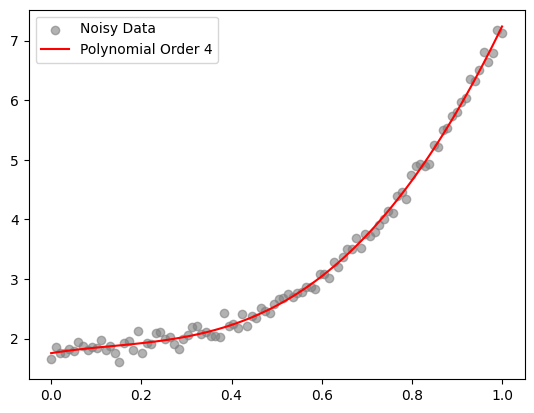

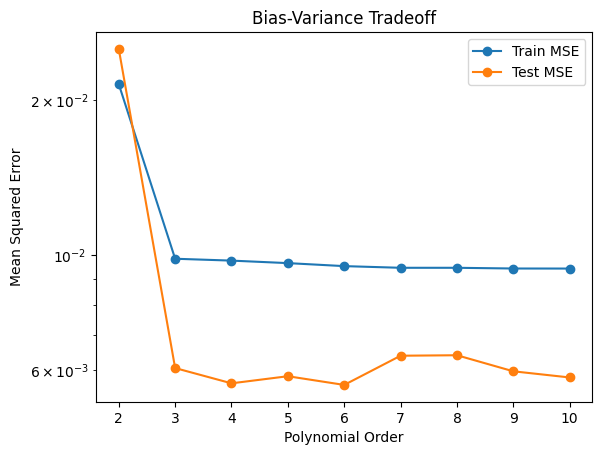

In [27]:
'imported libraries'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Create a polynomial of a given order
def create_polynomial_data(order, n_samples=100):
    '''
    order : int. order of polynomial.
    n_smaples : int. number of samples, domain resolution.
    '''
    np.random.seed(0) # set seed for reproducibility
    X = np.linspace(0, 1, n_samples) # system domain on [0,1]
    '''
    take the domain and raise it to some integer power. scale this distribution
    of numbers by a random number from a Gaussian and sum the points. then, move
    to next order.
    '''
    y_true = sum([np.random.randn() * (X ** i) for i in range(order + 1)])
    return X, y_true

# Step 2: Add noise to the polynomial
def add_noise(y_true, noise_level=0.1):
    '''
    y_true : array-like. the true distribution.
    noise_level : float. the std of the Gaussian. Default value : 0.1. 
    '''

    '''
    Draw from a Gaussian the number of points in y_true with mean 0 and std equal
    to noise_level.
    '''
    noise = np.random.normal(0, noise_level, size=len(y_true))
    return y_true + noise # add noise to y_true.

# Step 3: Fit polynomial and plot
def fit_and_plot(X, y, order):
    '''
    X : array-like. system domain
    y : array-like. target distribution
    order : int. order of polynomial
    '''

    'prepare an instance of the polynomial transformer with given order.'
    poly = PolynomialFeatures(degree=order)
    'change X into a column vector and fit a polynomial to it of given order.'
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    'Establish an instance of a linear regressor'
    model = LinearRegression()
    'use the polynomial feature data to fit y'
    model.fit(X_poly, y)
    'get a prediction for y off of the polynomial version of X'
    y_pred = model.predict(X_poly)
    
    # Plot original noisy data and fitted polynomial, Plot!
    plt.scatter(X, y, label='Noisy Data', color='gray', alpha=0.6)
    plt.plot(X, y_pred, label=f'Polynomial Order {order}', color='red')
    plt.legend()
    plt.show()
    return model, poly

# Step 4: Fit on training set and calculate MSE on test set
def train_test_evaluate(X, y, order, test_size=0.2):
    '''
    X : array-like. system domain
    y : array-like. system range
    order : int. desired order of polynomial
    test_size : float. the train/test split. default value : 0.5.
    '''
    'randomly split the datasets according to test_size split. random state for reproducibility'
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    'this is the same process as found in "fit and plot".'
    poly = PolynomialFeatures(degree=order)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    'get performance statistics'
    # Calculate MSE on both train and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    return mse_train, mse_test

# Step 5: Vary polynomial order and plot MSE vs order
def bias_variance_tradeoff(X, y, max_order):
    '''
    X : array-like. system domain
    y : array-like. system range
    max_order : int. upper bound of order for polynomial
    '''
    mse_train_list, mse_test_list = [], []
    orders = range(2, max_order + 1)

    'get performance statistics of each orders fit to y.'
    for order in orders:
        mse_train, mse_test = train_test_evaluate(X, y, order)
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
    
    # Plot MSE vs polynomial order, Plot!
    plt.plot(orders, mse_train_list, label='Train MSE', marker='o')
    plt.plot(orders, mse_test_list, label='Test MSE', marker='o')
    plt.xlabel('Polynomial Order')
    plt.ylabel('Mean Squared Error')
    plt.title('Bias-Variance Tradeoff')
    plt.yscale('log')
    plt.legend()
    plt.show()

# Step 6: Putting it all together

# Generate dataset
order_true = 4  # True polynomial order
X, y_true = create_polynomial_data(order_true)
y_noisy = add_noise(y_true, noise_level=.1)

# Plot the polynomial fit for the true model and noisy data
fit_and_plot(X, y_noisy, order_true)

# Analyze the bias-variance tradeoff
max_order = 10  # Vary the polynomial degree up to 10
bias_variance_tradeoff(X, y_noisy, max_order)

We passed a true order and constructed a polynomial with terms up to the true order with random coefficients. Then we added some noise to the true dataset to mimic more realistic data. Next we specify a range of orders to investigate and see if we can encapsulate the behaviour of the system. This behaviour is relayed via the mean squared error and is a common metric for measuring fitness of function.

We see in the training set that the MSE goes down which is to be expected as more complex models have more liberty in fitting to the data. For the test set, we see a decline in MSE with increasing order until order 4 (the true order) and then some variability in performance up to order 6. From there we see that the MSE increases with order until it hits another region of variability starting at order 8. This behaviour is to be interpreted as underfitting (orders 2-3) which fails to capture the general dynamics of the distrbution, proper fitting (orders 4-6) which gives adequate fitting to the model, and overfitting (orders 7+) which depicts the largest deviance in performance between the test and training sets and indicates overfitting by introducing variances which create crucial differences in the two sets.

I see that less noisy data allows for better fits but we still see the divergance in the MSE training and test sets which indicates overfitting. Increasing the noise exacerbates this divergance and also seems to seperate the splits when in the underfitting region. Finally, by playing with the test/train split I see that with a majority value towards training the train MSE performs quite well but the reliability in the testing set decreases. Flipping this majority greatly limits the performance of the training set but shows an increase in performance in the training set. This would not encourage us in general as a bad training set performance would not make us think the training would do much better. I also see that while the testing set becomes better, the overfitting region is smoothed out, blurring the candidacy for any particular proper order.

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.